# Introduction to the dataset
each record is a movie showed in TV in 1992. In each record we have the following information:
* **NETWORK**: broadcasting network (ABN, BBS, or CBC)
* **MONTH**: 1=January, 2=February, ..., 12=December
* **DAY**: 1=Monday, ..., 7=Sunday
* **RATING**: rate (from 0 to 100) for movie
* **FACT**: 1=based on true events, 0=fictional
* **STARS**: number of actors or actress paid over $300,000
* **PREVIOUS RATING**: rate for program immediately preceding movie on same network
* **COMPETITION**: average rates received by the two competing networks during the movie's broadcast

let's import [numpy](http://numpy.org) and [matplotlib](http://matplotlib.org)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
random.seed(1)

# Importing the data

The following lines allow us to open a CSV file, parse the lines and load it in a numpy array. Remember, next days you will see more optimal solutions to load data (e.g. **pandas**)!

In [3]:
f=file('Colonial_Broadcasting_Company_dataset.csv','r')

In [4]:
tt=[]
for i,el in enumerate(f):
    if i==0:#if we are on the first line, we store the columns' name in an array
        col_name=el.strip().split(',')
    else:#
        tt_temp=[]
        for el1 in el.strip().split(','):
            try:
                tt_temp.append(float(el1))
            except:
                tt_temp.append(el1)        
        tt.append(tt_temp)
# tt=array(tt)

In [5]:
f.close()

In [6]:
tt=array(tt,object)

In [7]:
tt[-10:,:]

array([[79.0, '"CBC"', 10.0, 1.0, 13.8, 1.0, 0.0, 10.2, 16.6],
       [80.0, '"CBC"', 10.0, 7.0, 11.9, 1.0, 0.0, 11.8, 12.2],
       [81.0, '"CBC"', 10.0, 1.0, 14.6, 0.0, 0.0, 14.9, 14.9],
       [82.0, '"CBC"', 11.0, 1.0, 15.8, 1.0, 1.0, 13.4, 17.2],
       [83.0, '"CBC"', 11.0, 1.0, 15.4, 0.0, 1.0, 13.6, 16.8],
       [84.0, '"CBC"', 11.0, 1.0, 12.8, 0.0, 0.0, 12.7, 14.6],
       [85.0, '"CBC"', 12.0, 7.0, 12.8, 0.0, 0.0, 12.0, 18.6],
       [86.0, '"CBC"', 12.0, 1.0, 15.1, 0.0, 0.0, 14.1, 15.5],
       [87.0, '"CBC"', 12.0, 1.0, 11.4, 0.0, 1.0, 11.2, 16.4],
       [88.0, '"CBC"', 12.0, 1.0, 19.1, 1.0, 0.0, 12.6, 15.4]], dtype=object)

In [8]:
col_name

['"Observations "',
 '"Network "',
 '"Month "',
 '"Day "',
 '"Rating"',
 '"Fact "',
 '"Stars "',
 '"Previous rating  "',
 '"Competition "']

# First explorations
## Some exercises
Try to anser the following questions:

What are the mean values of each columns? Try to use the less code that you can and remember the Zen of Python

In [20]:
tt[:,2:].mean(axis=0) #axis 0 fa per colonne

array([5.875, 4.25, 13.819318181818176, 0.4090909090909091,
       0.4090909090909091, 13.77386363636363, 14.059090909090907], dtype=object)

What are the standard-deviations of the third column?

In [22]:
tt[:,2].std()

3.8900002921243173

What are the 87.2th percentile of each columns? [Hint: try to search on google numpy percentile]

In [24]:
percentile(tt[:,2:],87.2,axis=0)

array([11.0, 7.0, 16.5592, 1.0, 1.0, 17.0864, 16.8], dtype=object)

In [25]:
percentile(tt[:,2:],[25,75],axis=0) #voglio 2 percentili

array([[3.0, 1.0, 11.674999999999999, 0.0, 0.0, 11.95, 12.549999999999999],
       [10.0, 7.0, 15.8, 1.0, 1.0, 15.9, 15.325000000000001]], dtype=object)

Try to answer previous questions but on the sample obtained only for Network 'ABN'

In [35]:
percentile(tt[tt[:,1]=='"ABN"',2:],59,axis=0)

array([5.0, 7.0, 15.5, 0.0, 0.8299999999999983, 16.583, 13.083], dtype=object)

Are you able to say what is the mean rating for each network?

In [39]:
tt[tt[:,1]=='"ABN"',4].mean()

14.76052631578947

In [42]:
tt[tt[:,1]=='"ABN"',4]

array([14.6, 10.8, 16.2, 12.8, 16.0, 18.9, 14.0, 19.5, 14.7, 16.3, 15.8,
       17.1, 11.5, 16.0, 11.7, 14.2, 11.2, 10.9, 13.3, 15.5, 16.6, 16.3,
       15.8, 13.3, 15.4, 14.7, 15.5, 14.7, 15.9, 13.8, 10.0, 12.9, 15.4,
       14.5, 18.8, 16.7, 12.8, 16.8], dtype=object)

In [43]:
tt[tt[:,1]=='"ABN"',4].mean()

14.76052631578947

In [48]:
[tt[tt[:,1]==pippo,4].mean() for pippo in ['"ABN"', '"CBC"', '"BBS"']]

[14.76052631578947, 13.363333333333335, 12.715]

and to plot them?

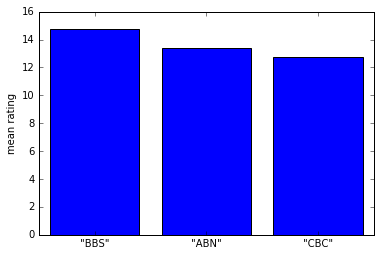

In [52]:
bar(arange(3)-.4,[tt[tt[:,1]==network,4].mean() for network in ['"ABN"', '"CBC"', '"BBS"']])
xticks(range(3),['"BBS"','"ABN"', '"CBC"'])
ylabel('mean rating')
show()

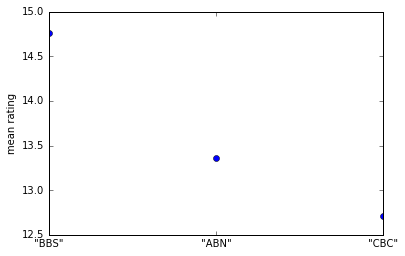

In [54]:
plot(arange(3),[tt[tt[:,1]==network,4].mean() for network in ['"ABN"', '"CBC"', '"BBS"']],'o')
xticks(range(3),['"BBS"','"ABN"', '"CBC"'])
ylabel('mean rating')
show()

Are you able to plot the histogram of the movies ratings?

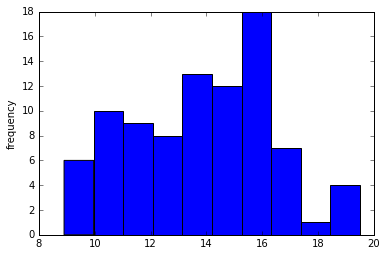

In [58]:
hist(tt[:,4],10)
ylabel('frequency')
show()

In [59]:
[tt[:,4],10]

[array([15.6, 10.8, 14.1, 16.8, 14.3, 17.1, 8.9, 16.2, 9.4, 10.2, 9.4, 12.1,
        10.7, 15.0, 10.2, 10.3, 10.8, 14.4, 14.4, 13.6, 14.6, 10.8, 16.2,
        12.8, 16.0, 18.9, 14.0, 19.5, 14.7, 16.3, 15.8, 17.1, 11.5, 16.0,
        11.7, 14.2, 11.2, 10.9, 13.3, 15.5, 16.6, 16.3, 15.8, 13.3, 15.4,
        14.7, 15.5, 14.7, 15.9, 13.8, 10.0, 12.9, 15.4, 14.5, 18.8, 16.7,
        12.8, 16.8, 14.0, 11.3, 13.6, 12.9, 13.2, 16.0, 14.6, 16.6, 17.5,
        11.6, 8.9, 15.6, 9.2, 11.8, 11.0, 9.5, 11.6, 13.3, 13.6, 12.4, 13.8,
        11.9, 14.6, 15.8, 15.4, 12.8, 12.8, 15.1, 11.4, 19.1], dtype=object),
 10]

# Something new: [boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)

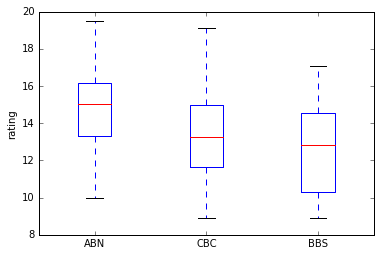

In [60]:
boxplot([list(tt[tt[:,1]=='"ABN"',4]),list(tt[tt[:,1]=='"CBC"',4]),list(tt[tt[:,1]=='"BBS"',4])],labels=['ABN','CBC','BBS'])
ylabel('rating')

In [64]:
list(tt[tt[:,1]=='"ABN"',4]),list(tt[tt[:,1]=='"CBC"',4]),list(tt[tt[:,1]=='"BBS"',4])

([14.6,
  10.8,
  16.2,
  12.8,
  16.0,
  18.9,
  14.0,
  19.5,
  14.7,
  16.3,
  15.8,
  17.1,
  11.5,
  16.0,
  11.7,
  14.2,
  11.2,
  10.9,
  13.3,
  15.5,
  16.6,
  16.3,
  15.8,
  13.3,
  15.4,
  14.7,
  15.5,
  14.7,
  15.9,
  13.8,
  10.0,
  12.9,
  15.4,
  14.5,
  18.8,
  16.7,
  12.8,
  16.8],
 [14.0,
  11.3,
  13.6,
  12.9,
  13.2,
  16.0,
  14.6,
  16.6,
  17.5,
  11.6,
  8.9,
  15.6,
  9.2,
  11.8,
  11.0,
  9.5,
  11.6,
  13.3,
  13.6,
  12.4,
  13.8,
  11.9,
  14.6,
  15.8,
  15.4,
  12.8,
  12.8,
  15.1,
  11.4,
  19.1],
 [15.6,
  10.8,
  14.1,
  16.8,
  14.3,
  17.1,
  8.9,
  16.2,
  9.4,
  10.2,
  9.4,
  12.1,
  10.7,
  15.0,
  10.2,
  10.3,
  10.8,
  14.4,
  14.4,
  13.6])

Are you able to comment the previous plot?

### a more "pythonic" solution

In [65]:
network=set(tt[:,1])

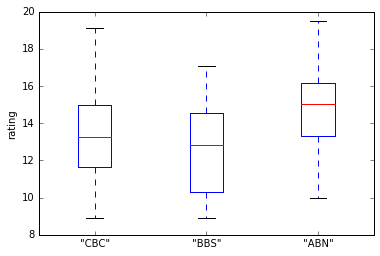

In [66]:
boxplot([list(tt[tt[:,1]==netw,4]) for netw in network],labels=network)
ylabel('rating')

### Exercise
Use the boxplot to show ratings for the following two groups: 
* movies with at least a stars 
* movies without stars

ValueError: Dimensions of labels and X must be compatible

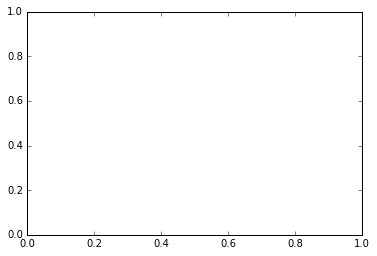

In [135]:
boxplot(list(tt[tt[:,6]>0,4]),list(tt[tt[:,6]==0,4]),labels=['stars','nostars'])
ylabel('rating')

Use the boxplot to show ratings for the following two groups: 
* fictional-movies 
* fact-movies

# Correlation
With a plot try explore if there is any association between the variable <i>rating</i> and the variable <i>previous rating</i>

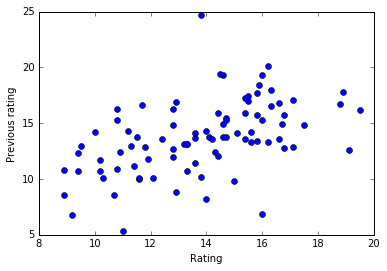

In [84]:
plot(tt[:,4],tt[:,-2],'o')
xlabel('Rating')
ylabel('Previous rating')

### [Pearson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr) Correlation

In [85]:
from scipy.stats import pearsonr

In [90]:
pearsonr(tt[:,4],tt[:,7]) #il coefficeinte di pearson (correlazione positiva e' il primo il secondo elemento e' il p value (nel caso e' basso)

(0.48410767230660262, 1.7646845258591581e-06)

Are you able to comment the previous result? Hint: <i>?pearsonr</i> or <i>help(pearsonr)</i>

### [Spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) Correlation


In [88]:
from scipy.stats import spearmanr

In [89]:
spearmanr(tt[:,4],tt[:,7])

SpearmanrResult(correlation=0.52870439323700247, pvalue=1.1907586936796334e-07)

### Exercise
Try to answer the following question: What is the correlation between the rating a movie received on a network and the mean of the rating the two competing networks received in the same time. (Use all the tool that you want)

In [91]:
col_name

['"Observations "',
 '"Network "',
 '"Month "',
 '"Day "',
 '"Rating"',
 '"Fact "',
 '"Stars "',
 '"Previous rating  "',
 '"Competition "']

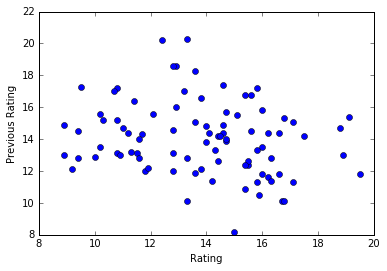

In [98]:
plot(tt[:,4],tt[:,-1],'o')
xlabel('Rating')
ylabel('Previous Rating')

In [97]:
pearsonr(tt[:,4],tt[:,-1])

(-0.20548568615265045, 0.054780369888899449)

In [99]:
spearmanr(tt[:,4],tt[:,-1])

SpearmanrResult(correlation=-0.23229751312182101, pvalue=0.029415613453713386)

### Exercise

In [100]:
ya=random.rand(237)*50
yb=exp(2.5-ya+random.randn(237)*10)

we define two arrays of the same length: **ya** and **yb**. Plot one vs. the other. Do you think they are correlated?

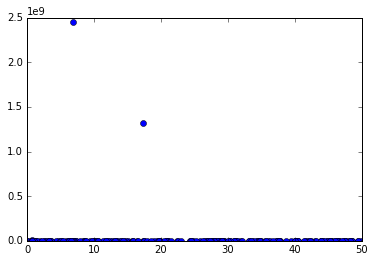

In [105]:
plot(ya,yb,'o')

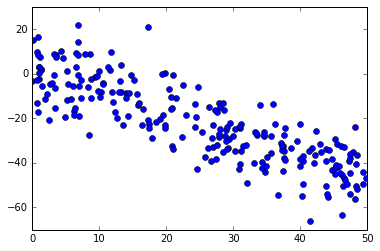

In [106]:
plot(ya,log(yb),'o') ##per vedere qualcosa

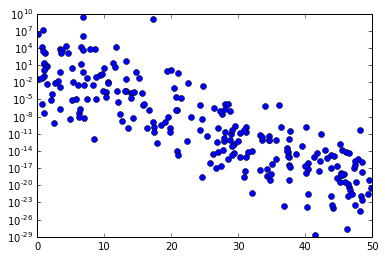

In [109]:
semilogy(ya,yb,'o')

Try to quantify the correlation:

In [102]:
pearsonr(ya,yb)

(-0.0827435290741102, 0.20434719513337313)

In [103]:
spearmanr(ya,yb)

SpearmanrResult(correlation=-0.85617469472234287, pvalue=2.4608194849512098e-69)

### Exercise

In [ ]:
yc1=random.rand(123)*2
yc2=random.rand(17)*2
yd=hstack([11.+yc1+random.randn(123)*1.5,11.+yc2+random.randn(17)*50.])
yc=hstack([yc1,yc2])

we define two arrays of the same length: **yc** and **yd**. Are they correlated?

# Comparing two samples: KS
### Exercise
Use the Kolmogorov-Smirnov test to say if movies with at least a star receive different ratings from moviews without stars.

In [111]:
from scipy.stats import ks_2samp

In [114]:
ks_2samp(tt[tt[:,6]==0,4],tt[tt[:,6]>0,4]) ##risultato non possiamo rifiutare 
##l'ipotesi nulla quindi non cambia nulla avere o non avere una star

Ks_2sampResult(statistic=0.20261437908496732, pvalue=0.32178662567692801)

Let's say that for some reasons we do not believe the result of this test (e.g. data do not meet the assumptions). Therefore, you would like to use a boostrap method to evaluate the KS statistic previously evaluated (i.e. the statistic that you get is it a matter of chance or not?)

In [115]:
rating=tt[:,4].copy()
star=tt[:,6].copy()

In [116]:
from scipy.stats import ks_2samp

In [117]:
res=[]
for el in range(1000):
    shuffle(star)
    res.append(ks_2samp(rating[star<1],rating[star>=1])[0])

(array([  18.,   42.,  107.,  139.,  124.,  166.,  122.,   74.,   63.,
          56.,   32.,   14.,   17.,    9.,    6.,    5.,    2.,    1.,
           2.,    1.]),
 array([ 0.06753813,  0.08567538,  0.10381264,  0.12194989,  0.14008715,
         0.1582244 ,  0.17636166,  0.19449891,  0.21263617,  0.23077342,
         0.24891068,  0.26704793,  0.28518519,  0.30332244,  0.32145969,
         0.33959695,  0.3577342 ,  0.37587146,  0.39400871,  0.41214597,
         0.43028322]),
 <a list of 20 Patch objects>)

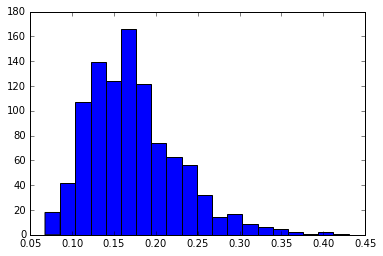

In [118]:
hist(res,20)

In [119]:
print 'more than %g reshuffled samples (over %g) have a KS statistic larger than %g'%(sum(res>ks_2samp(tt[tt[:,6]<1,4],tt[tt[:,6]>=1,4])[0]),len(res),ks_2samp(tt[tt[:,6]<1,4],tt[tt[:,6]>=1,4])[0])

more than 258 reshuffled samples (over 1000) have a KS statistic larger than 0.202614


### Exercise
Are the ratings for movies based on true events different from the fictional ones?

In [127]:
ks_2samp(tt[tt[:,-4]==0,4],tt[tt[:,-4]==1,4])

Ks_2sampResult(statistic=0.3611111111111111, pvalue=0.0054819316875556875)

# Linear Regressions
A useful library to perform **linear regressions** and other statistical procedures is [StatsModels](http://statsmodels.sourceforge.net/). To import it:

In [128]:
import statsmodels.api as sm

## [Ordinary Least Squares](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html)
Let's try to evaluate the relationship between the movies **rating** and the following two explanatory variables:
* **previous rating**, rating for program immediately preceding movie on same network
* **competition**, average of ratings received by the two competing networks during the movie's broadcast

In [129]:
res=sm.OLS(tt[:,4].astype(float),tt[:,[-2,-1]].astype(float)).fit()

In [132]:
print res.summary() #piu' l'R2 e' alto meglio e'. il valore e' tra -1 e 1. Qui in questo caso
# e' vicino a 1 quindi il modello e' ok.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1285.
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           8.73e-65
Time:                        16:16:45   Log-Likelihood:                -206.48
No. Observations:                  88   AIC:                             417.0
Df Residuals:                      86   BIC:                             421.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6295      0.064      9.797      0.0

rating = 0,6296 * previous_rating+0,3557*competion 
questo e' il modello lineare ed il p value mi dice che dovrebbe essere significativo

#### exercise
are you able to comment the results? Are they good or not?

A useful visualization to evaluate the performance of the model is the following

(5, 25)

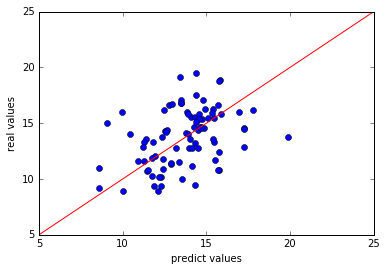

In [137]:
plot(res.fittedvalues,tt[:,4],'o')
plot([0,30],[0,30],'r')
ylabel('real values')
xlabel('predict values')
xlim(5,25)
ylim(5,25)

### Adding the intercept
Previous model that we tested was **rating ~ previous rating + competition**. We would like to add an intercept to our model. To do so in statsmodel we have to add a list of ones to the explenatory variables with the command **add_constant**

In [138]:
from statsmodels.tools import add_constant

In [139]:
res=sm.OLS(tt[:,4].astype(float),add_constant(tt[:,[-2,-1]].astype(float))).fit()

In [140]:
print res.summary() #piu' basso e' l'aic e piu' il modello si avvicina

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     13.90
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           6.00e-06
Time:                        16:25:53   Log-Likelihood:                -194.05
No. Observations:                  88   AIC:                             394.1
Df Residuals:                      85   BIC:                             401.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.5757      2.008      5.268      0.0

#### Exercise
Is this model better than the previous? How could you say that?

#### Exercise
Are the variables used in this model all useful? What variable will you choose to drop from the model? Fit that model and evaluate it.

#### Exercise
With this model plot the real data and the fitted linear model. (Remember, there are several ways to do. The one that use some of the statsmodel features will give in next line).

In [147]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

(8, 20)

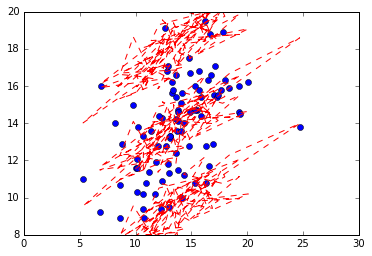

In [148]:
prstd, iv_l, iv_u = wls_prediction_std(res)
plot(tt[:,-2], tt[:,4], 'bo', label="real data")
plot(tt[:,-2], res.fittedvalues, 'r--', label="OLS")
plot(tt[:,-2], iv_l, 'r--')
plot(tt[:,-2], iv_u, 'r--')
xlim(0,30)
ylim(8,20)

#### Exercise
Are you able to use all the variables in the dataset as predictors of the movie rating? Try it to use as many variables as you can.

In [141]:
res = sm.OLS(tt[:,4].astype(float),add_constant(tt[:,[-2]].astype(float))).fit()

Would you keep all of them?

In [142]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     26.32
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.76e-06
Time:                        16:32:31   Log-Likelihood:                -194.75
No. Observations:                  88   AIC:                             393.5
Df Residuals:                      86   BIC:                             398.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.5771      1.049      8.175      0.0

### Dummy variables
Categorical variables could be not used in linear model. A workaround is to create a **dummy variables**. For instance, consider the second column of our dataset. It is filled by 'ABN', 'BBS', or 'CBC'. We could create a further column which values is one if the newtork is 'ABN' and zero otherwise. In this way we have a numerical variables that could be a useful predictor in our linear model.

In [143]:
ABN=array([array([el=='"ABN"']) for el in tt[:,1]],float)

In [144]:
tt_dummy=append(tt,ABN,axis=1)

In [145]:
res=sm.OLS(tt_dummy[:,4].astype(float),add_constant(tt_dummy[:,[2,3,5,6,7,8,9]].astype(float))).fit()

In [146]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     6.723
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           2.88e-06
Time:                        16:34:44   Log-Likelihood:                -186.14
No. Observations:                  88   AIC:                             388.3
Df Residuals:                      80   BIC:                             408.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.2789      2.131      4.823      0.0

#### Exercise
Create a new dummy variable for network BBS and refit previous model with this new variable

#### Exercise
Create the following new dummy variables and fit a model with all the predictors:
* OCT if month==10
* DEC if mont==12
* APR-MAY if month==4 or month==5
* MON if day==1
* SUN if day==7

#### Exercise
Answer the following questions using the previous model: 
* you are considering to change the network programmation by replacing a show at 8pm with rating 17.5 with another with rating 20.  What would be the expected change in rating for the show at 9pm?
* other scenario: what if ABN and BBS schedule different programs, each of which is expected to rate 2 rating points higher?